# Questions

Fill in your name and the link to this file on your github.

* Name: Michael Carr  
* Link to github URL: ___

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import scipy

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split

# ML: Linear Regression

So this starts with linear regression. If you want a deeper dive than what I cover in class, you can refer to [this page](https://realpython.com/linear-regression-in-python/)

The exercises come from this workbook, which has somewhat helpful explanations too: https://csmastersuh.github.io/data_analysis_with_python_2020/linear_regression.html

# Exercise 10: Linear Regression

You'll need to make up some data for this. Don't spend too much time on this one, it's less interesting compared to the others.

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

array([ 1.79337657,  3.76536968,  3.79098949,  4.46152757,  5.10743066,
        5.6140947 ,  7.02891204,  7.74973446,  9.11005365, 10.86537202,
       12.33084945, 11.56469754, 15.07296471, 14.30071558, 13.78321409,
       15.43969846, 19.56196459, 18.32495762, 19.24660774, 22.61401164])

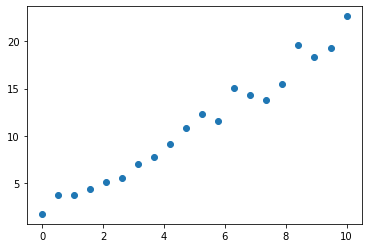

In [4]:
n=20
# Linearly increasing x values
x = np.linspace(0, 10, n)
# Wonky line of points
y = x*2 + 1 + 1*np.random.randn(n)
display(x, y)
plt.scatter(x, y)
plt.show()

# Do actual linear regression here


# Exercise 11: Mystery Data

This one is far more interesting. You can download the file from [here](https://raw.githubusercontent.com/AnkS4/hy-data-analysis-with-python-2020/master/part05-e11_mystery_data/src/mystery_data.tsv). Make sure it gets the right filename!

You don't need to define any functions, as they demand, although you might find that helpful to do.

In [20]:
df = pd.read_csv("mystery_data.tsv","\t")
model =LinearRegression(fit_intercept=False)
model.fit(df.iloc[:,0:5], df.iloc[:,5])
coefficients = model.coef_
for i, co in enumerate(coefficients):
    print(f"Coefficient of X{i+1} is {co}")

Coefficient of X1 is 2.999999999999995
Coefficient of X2 is -1.0
Coefficient of X3 is 7.000000000000005
Coefficient of X4 is 1.3322676295501878e-15
Coefficient of X5 is -20.000000000000004


## Exercise 12: Coefficient of Determination

Read over this entire problem, parts 1 and 2.

This reuses the same `mystery_data.tsv` file as before.

Again, you do not need to define their function. Just calculate the R2 scores and print them, as they direct.

In [21]:
from sklearn import linear_model
X = df.iloc[:,0:5]
y = df.iloc[:,5]
regression = linear_model.LinearRegression()
regression.fit(X,y)
scores = []
scores.append(regression.score(X,y))

for i in X:
    regression.fit(df[i].values.reshape(-1,1),y)
    score = regression.score(df[i].values.reshape(-1,1),y)
    scores.append(score)

for i,n in enumerate(scores):
    if i == 0:
        print(f"R2 score with X: {n}")
    else:
        print(f"R2 score with X{i+1}: {n}")

R2 score with X: 1.0
R2 score with X2: 0.01691827260276868
R2 score with X3: 0.008964585308688933
R2 score with X4: 0.08785404530656282
R2 score with X5: 0.0003023708825460325
R2 score with X6: 0.8679744020096123


## Exercise 13: Cycling Weather

I've already prepared the data that they require for this assignment. You can download it [here](https://gist.githubusercontent.com/acbart/466174a04e9a2505c4c25f91fc6dd4f6/raw/726865070677ec7dede17a08095624e0ea35e7cd/biking.csv).

The first column is the index, you can safely ignore it. The next 7 columns are straightforward. The last few columns are locations in Finland that have measuring stations. I recommend using `Baana` as they say in the instructions for testing.


In [7]:
df1 = pd.read_csv("biking.csv")
reg = linear_model.LinearRegression(fit_intercept = True)
X = df1[["Precipitation amount (mm)", "Snow depth (cm)", "Air temperature (degC)"]]
station = "Baana"
y = df1[[station]]
reg.fit(X,y)
coef = reg.coef_[0]
score = reg.score(X,y)
print(f"Measuring station: {station}")
print(f"Precipitation: {coef[0]}")
print(f"Snow Depth: {coef[1]}")
print(f"temp: {coef[2]}")
print(f"Score: {score}")



Measuring station: Baana
Precipitation: -52.17954896001862
Snow Depth: -32.937668606856946
temp: 169.24225037357715
Score: 0.5750246253469836


# ML Naive Bayes Classification

This is the next section of the exercises, from: https://csmastersuh.github.io/data_analysis_with_python_2020/bayes.html

In addition to the reading, I recommend this video: https://www.youtube.com/watch?v=CPqOCI0ahss


## Exercise 1: Blob Classification

(**OPTIONAL**) This one is very vague, and they're actually asking you to generate your own test data using the `make_blobs` function from `sklearn`'s `datasets` submodule. I've already started that work for you. But honestly if you want to skip it, I don't think it's a helpful starting question.

In [8]:
def blob_classification(X, y):
    # Put ML stuff here
    pass

# Create the training data and validation data
X, y = datasets.make_blobs(100, 2, centers=2, random_state=2, cluster_std=2.5)
# Run your ML predictions
print("The accuracy score is", blob_classification(X, y))
# Run this on some new data
a=np.array([[2, 2, 0, 2.5],
            [2, 3, 1, 1.5],
            [2, 2, 6, 3.5],
            [2, 2, 3, 1.2],
            [2, 4, 4, 2.7]])
accuracies = []
for row in a:
    X,y = datasets.make_blobs(100, int(row[0]), centers=int(row[1]),
                              random_state=int(row[2]), cluster_std=row[3])
    accuracies.append(blob_classification(X, y))
print(repr(np.hstack([a, np.array(accuracies)[:,np.newaxis]])))
# The last column should be the categorizations

The accuracy score is None
array([[2.0, 2.0, 0.0, 2.5, None],
       [2.0, 3.0, 1.0, 1.5, None],
       [2.0, 2.0, 6.0, 3.5, None],
       [2.0, 2.0, 3.0, 1.2, None],
       [2.0, 4.0, 4.0, 2.7, None]], dtype=object)


## Exercise 2: Plant Classification

This is a much better question. The Iris dataset is a classic: https://en.wikipedia.org/wiki/Iris_flower_data_set

The wikipedia page gives an example of how to load the dataset.

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn import metrics
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
model = naive_bayes.GaussianNB()
model.fit(X_train, y_train)
y_fitted = model.predict(X_test)
ans = metrics.accuracy_score(y_test, y_fitted)
print(ans)


0.9666666666666667


## Exercise 3: Word Classification

(**Skip**)

This one is too much. They give some of the data as an XML file. It's an interesting problem, and you can find the data (and solution) [here](https://github.com/AnkS4/hy-data-analysis-with-python-2020/tree/master/part06-e03_word_classification/src) if you want to tackle it, but I'm skipping it.


## Exercise 4: Spam Detection

Download [ham.txt.gz](https://github.com/AnkS4/hy-data-analysis-with-python-2020/raw/master/part06-e04_spam_detection/src/ham.txt.gz) and [spam.txt.gz](https://github.com/AnkS4/hy-data-analysis-with-python-2020/raw/master/part06-e04_spam_detection/src/spam.txt.gz).

This one is much more interesting and reasonable. It requires processing some large text files, but that's actually the easiest part, as shown in the code below. The idea is that you have spam (bad emails) and ham (good emails), and you want to determine which is which. I've done similar email processing (detecting job ads for a conference) and I was impressed with how easily I could train a little data and get very good results.

In [22]:
import gzip
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


# Load the spam emails as strings in a list.
with gzip.open('spam.txt.gz', 'rb') as spam_file:
    spam = spam_file.readlines()
print("Number of spam emails loaded as strings:", len(spam))

# Now do the same thing with the `ham.txt.gz`

def spam_detection(random_state=0, fraction=1.0):
    with gzip.open('spam.txt.gz', 'rb') as f:
        file_content = f.readlines()
    spam = file_content[:int(0.1 * len(file_content))]
    with gzip.open('ham.txt.gz', 'rb') as f:
        file_content = f.readlines()
    ham = file_content[:int(0.1 * len(file_content))]

    X = ham + spam
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(X).toarray()

    y = np.zeros(len(X))
    y[len(ham):] = 1
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, train_size=0.75)
    model = MultinomialNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    score = accuracy_score(y_test, y_pred)
    #miss = (y_test != y_fitted).sum()
    miss = int((1-score) * (len(y_pred)))
    return score, len(X_test), miss
accuracy, total, misclassified = spam_detection()
print("Accuracy", accuracy)
print(f"{misclassified} messages out of {total}")

# And then do the actual ML stuff

Number of spam emails loaded as strings: 500
Accuracy 0.96
3 messages out of 75


# ML Clustering

This is the last section: https://csmastersuh.github.io/data_analysis_with_python_2020/clustering.html

This section is one of the most interesting in my opinion. K-Means is a pretty straightforward tool, and is really worth learning how to use it.

## Exercise 5: Plant Clustering

Same deal as before; use the IRIS dataset. Since this has so many parameters, it can be tricky to make a good visualization.

Accuracy 0.24


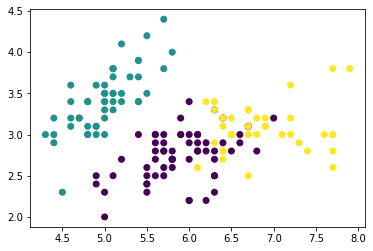

In [29]:
import scipy
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

iris = load_iris()
iris_data = iris["data"]
iris_target = iris["target"]
model = KMeans(3)
model.fit(iris_data)
plt.scatter(iris_data[:,0],iris_data[:,1],c=model.labels_)
print(f"Accuracy {accuracy_score(iris_target,model.labels_)}")


## Exercise 6: Non-convex Clusters

The data for this question is [here](https://raw.githubusercontent.com/AnkS4/hy-data-analysis-with-python-2020/master/part06-e06_nonconvex_clusters/src/data.tsv).

This one shows off a different clustering algorithm ([`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)), which is "Good for data which contains clusters of similar density". I wasn't very familiar with DBSCAN, but it does seem much better than KMeans. It doesn't require you to figure out the number of clusters, and seems to be tricked less by unusual data. [This page](https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html) was very helpful in breaking that difference down.

The reference answer uses a `for` loop and `np.arange` to try `e` values from 0.05 to 0.2 in 0.05 increments, but I don't mind if you just manually try some different `e` values.

Please do make a visualization with clusters colored, since I think that really highlights what we are doing!

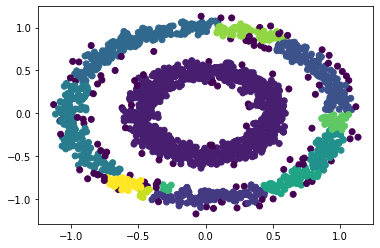

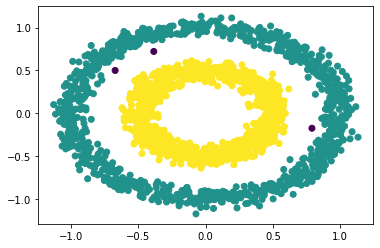

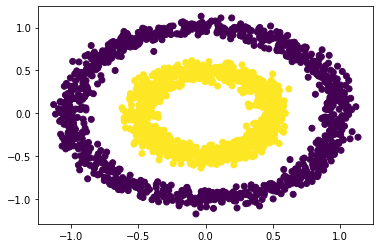

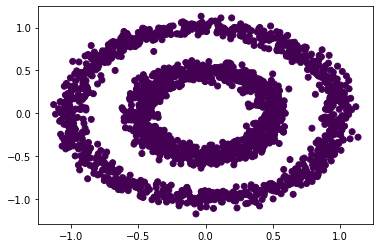

    eps  Score  Clusters  Outliers
0  0.05    NaN      12.0     118.0
1  0.10    1.0       2.0       3.0
2  0.15    1.0       2.0       0.0
3  0.20    NaN       1.0       0.0


In [51]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score

def find_permutation(n_clusters, real_labels, labels):
    permutation=[]
    for i in range(n_clusters):
        idx = labels == i
        # Choose the most common label among data points in the cluster
        new_label=scipy.stats.mode(real_labels[idx])[0][0]
        permutation.append(new_label)
    return permutation

df = pd.read_csv("6data.tsv", sep="\t")
X = df[["X1","X2"]]
y = df["y"]
results = []
for e in np.arange(0.05, 0.2, 0.05):
    model = DBSCAN(e)
    model.fit(X)
    idx = model.labels_ == -1
    outliers = np.sum(idx)
    clusters = max(model.labels_) + 1
    if clusters == len(y.unique()):
        permutation = find_permutation(clusters, y, model.labels_)
        score = accuracy_score(y[~idx], [permutation[label] for label in model.labels_[~idx]])
    else:
        score = np.nan
    results.append([e, score, clusters, outliers])
    
    plt.scatter(X["X1"],X["X2"],c=model.labels_)
    plt.show()
end = pd.DataFrame(data=results,columns = ["eps","Score","Clusters", "Outliers"],dtype = "float64")
print(end)

## Exercise 7: Binding Sites

Download the [`data.seq` file](https://raw.githubusercontent.com/AnkS4/hy-data-analysis-with-python-2020/master/part06-e07_binding_sites/src/data.seq); note that it is just a plain textual data file, despite the fancy extension.

They ask you to define `get_features_and_labels` to accept a filename, even though there's only one test file. Up to you if you want to hardcode the file path in or make it a flexible function.

There are multiple parts here, and they ask you to compare the euclidean and hamming distance. I think it's worth thinking about - if you don't get what they mean, do ask!

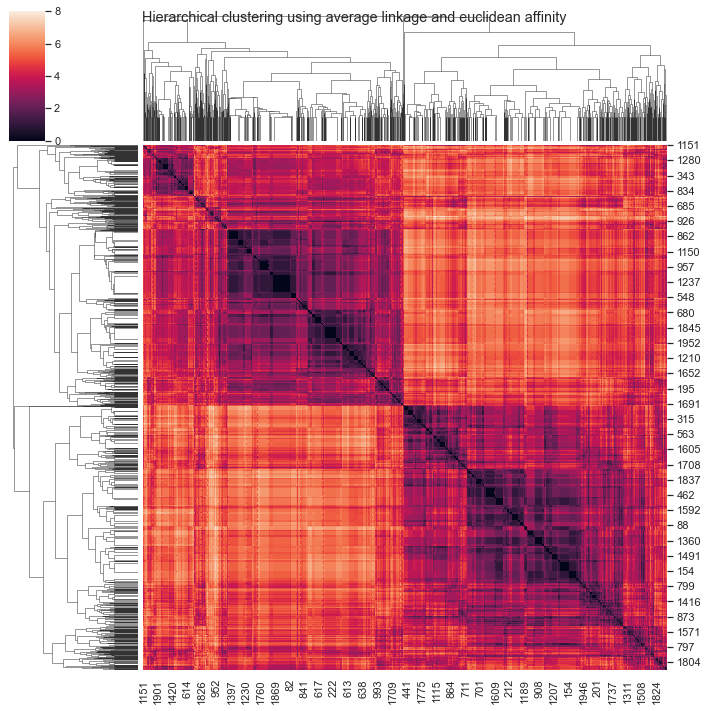

Euclidean Accuracy 0.9895


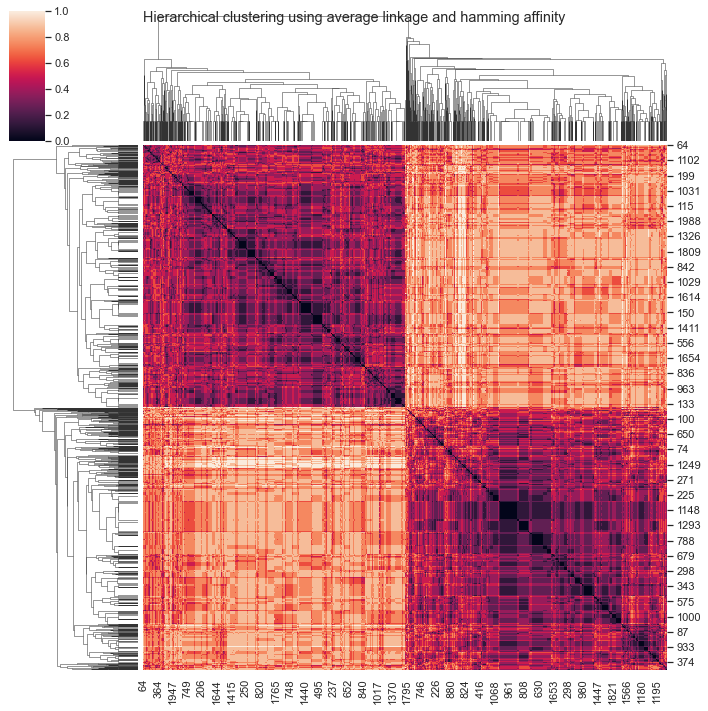

Hamming affinity 0.9985


In [58]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
from sklearn.metrics import pairwise_distances

from matplotlib import pyplot as plt

import seaborn as sns
sns.set(color_codes=True)
import scipy.spatial as sp
import scipy.cluster.hierarchy as hc

import scipy

def find_permutation(n_clusters, real_labels, labels):
    permutation=[]
    for i in range(n_clusters):
        idx = labels == i
        # Choose the most common label among data points in the cluster
        new_label=scipy.stats.mode(real_labels[idx])[0][0]
        permutation.append(new_label)
    return permutation

def toint(x):
    return 'ACGT'.find(x)

def get_features_and_labels(filename):
    df = pd.read_csv(filename, sep="\t")
    X = [[toint(j) for j in i] for i in df["X"]]
    #X = np.array(df.X.map(list).values.tolist())
    #toint2 = np.vectorize(toint)
    #X = toint2(A)
    return (np.array(X), df.y) #df[["y"]]

def plot(distances, method='average', affinity='euclidean'):
    mylinkage = hc.linkage(sp.distance.squareform(distances), method=method)
    g=sns.clustermap(distances, row_linkage=mylinkage, col_linkage=mylinkage )
    g.fig.suptitle(f"Hierarchical clustering using {method} linkage and {affinity} affinity")
    plt.show()

def cluster_euclidean(filename):
    X, y = get_features_and_labels(filename)
    model = AgglomerativeClustering(linkage="average", affinity="euclidean").fit(X)
    permutation = find_permutation(2, y, model.labels_)
    d = pairwise_distances(X, metric="euclidean")
    plot(d, "average", "euclidean")
    return accuracy_score(y, [permutation[label] for label in model.labels_])

def cluster_hamming(filename):
    X, y = get_features_and_labels(filename)
    d = pairwise_distances(X, metric="hamming")
    model = AgglomerativeClustering(linkage="average", affinity="precomputed").fit(d)
    permutation = find_permutation(2, y, model.labels_)
    plot(d, "average", "hamming")
    return accuracy_score(y, [permutation[label] for label in model.labels_])

print("Euclidean Accuracy", cluster_euclidean("7data.txt"))
print("Hamming Accuracy", cluster_hamming("7data.txt"))